## Series II

- Series structure, item count, NaNs
- Descriptive statistic
- Series arithmetics
- Sorting Series
- Filtering and custom transformations

In [2]:
import pandas as pd

## Reading In Data With `read_csv()`

In [3]:
csv_url = 'https://andybek.com/pandas-drinks'

In [4]:
pd.read_csv(csv_url)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [5]:
pd.read_csv(csv_url, usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [6]:
pd.read_csv(csv_url, usecols=['country', 'wine_servings'], index_col='country')

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0
...,...
Venezuela,3.0
Vietnam,1.0
Yemen,NaN


In [7]:
alcohol = pd.read_csv(csv_url, usecols=['country', 'wine_servings'], index_col='country')

In [8]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [9]:
type(alcohol)

pandas.core.frame.DataFrame

In [10]:
3.14 * 3 * 3

28.259999999999998

In [11]:
3.14 * 3 ** 3

84.78

In [12]:
alcohol = pd.read_csv(csv_url, usecols=['country', 'wine_servings'], index_col='country').squeeze("columns")

In [13]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [14]:
type(alcohol)

pandas.core.series.Series

## Series Sizing With `.size`, `.shape` and `.len`

In [15]:
alcohol.size

193

In [16]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [17]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [18]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [19]:
alcohol.values.size

193

In [20]:
alcohol.index.size

193

In [21]:
alcohol.values.size == alcohol.index.size

True

In [22]:
alcohol.shape

(193,)

In [23]:
type(alcohol.shape)

tuple

In [24]:
alcohol.size == alcohol.shape[0]

True

In [25]:
len(alcohol)

193

##### Size and Shape
- .size: number of elements in the series
    - series.size # 193
- .shape: tuple of the dimensions
    - for a series: (1D) shape, i.e. length for series
    - series.shape # (193,)
- .len(): python built-in function
    - len(series) # 193

## Unique Values And Series Monotonicity

In [26]:
alcohol.is_unique

False

In [27]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [28]:
alcohol.head().is_unique

True

In [29]:
alcohol.nunique() # gives the unique values in that sequence of values

71

In [30]:
alcohol.nunique(dropna=False)

72

In [31]:
# monotonicity attribute - order theory - a function preserve a given order

In [32]:
pd.Series([1, 2, 3]).is_monotonic_increasing # increasing

True

In [33]:
pd.Series([1, 2, 3, 3, 3]).is_monotonic_increasing # stagenent

True

In [34]:
pd.Series([1, 2, 3, 3, 3, 4, 6, 19]).is_monotonic_increasing # increasing

True

In [35]:
pd.Series([1, 2, 3, 3, 4, 6, 2, 1]).is_monotonic_increasing # decreasing

False

In [36]:
pd.Series([1, 2, 3, 2.2]).is_monotonic_increasing # increasing

False

In [37]:
pd.Series(reversed([1, 2, 3])).is_monotonic_decreasing

True

## The `count()` Method

In [38]:
alcohol.count() # only counts which are not-NA null

np.int64(162)

In [39]:
alcohol.hasnans

True

## Accessing And Counting NA's

In [40]:
alcohol.size

193

In [41]:
alcohol.count()

np.int64(162)

In [42]:
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [43]:
alcohol[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [44]:
type(alcohol[alcohol.isnull()].index)

pandas.core.indexes.base.Index

In [45]:
list(alcohol[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [46]:
len(list(alcohol[alcohol.isnull()].index))

31

In [47]:
# cumbersome: very difficult to work with
# antonym: pandorable -> adorable and involving pandas

In [48]:
alcohol.isnull().head(2)

country
Afghanistan     True
Albania        False
Name: wine_servings, dtype: bool

In [49]:
alcohol.isnull().sum()

np.int64(31)

In [50]:
# booleans are integer in python
sum([True, False, True])

2

In [51]:
all = alcohol.size

In [52]:
nonnulls = alcohol.count() # non-NA

In [53]:
nulls = alcohol.isnull().sum() # alcohol.isna().sum(), same

In [54]:
all == nonnulls + nulls

np.True_

###### Series Accounting
- .size: number of elements in the series
    - series.size # 193
- .count(): number of non-null elements
    - series.count() # 162
- .isna().sum(): number of null elements
    - series.isna().sum() # 31

## Another Approach

In [55]:
import numpy as np

Squential vs Vectorization Ops

**vectorization**: running operations on entire arrays

In [56]:
# ufunc -> universal function

In [57]:
np.isnan

# Don't recommand to use efunc directly because,
# those functions expect native dtypes and is array like objects by default

<ufunc 'isnan'>

In [58]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

In [59]:
ser

0    1.0
1    0.0
2    NaN
3    2.0
dtype: float64

In [60]:
np.nan

nan

In [61]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [62]:
alcohol[np.isnan].head()

country
Afghanistan   NaN
Bangladesh    NaN
Bhutan        NaN
Burundi       NaN
North Korea   NaN
Name: wine_servings, dtype: float64

In [63]:
alcohol[np.isnan].size # this is numpy aproach, very eligent and profenent

31

In [64]:
alcohol[alcohol.isna()].head()

country
Afghanistan   NaN
Bangladesh    NaN
Bhutan        NaN
Burundi       NaN
North Korea   NaN
Name: wine_servings, dtype: float64

## The Other Side: `notnull()` & `notna()`

In [65]:
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [66]:
alcohol.notnull().sum()

np.int64(162)

In [67]:
alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [68]:
alcohol.count()

np.int64(162)

In [69]:
alcohol.notnull().sum() + alcohol.isnull().sum() == alcohol.size

np.True_

## Booleans Are Literally Numbers In Python

True  : 1
False : 0

The bool type inherits from (is a subclass of) int

`bool` ==> `int` ==> `object`

In [70]:
True + 19

20

In [71]:
True + True - False + True * 3

5

In [72]:
try:
    5 / False
except:
    print('not possible')

not possible


In [73]:
type(True)

bool

In [74]:
type(False)

bool

In [75]:
bool.__mro__ # method resolution order

(bool, int, object)

In [76]:
int.__mro__

(int, object)

In [77]:
list.__mro__

(list, object)

In [78]:
alcohol.isnull().sum()

np.int64(31)

## Skill Challenge 😈

Isolate the non-nulls in the alcohol series and assign them to the variable wine_servings.

In [79]:
wine_servings = alcohol.loc[alcohol.notnull()]

What is the total wine consumed by countries in wine_servings

In [80]:
wine_servings.head()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
Name: wine_servings, dtype: float64

In [81]:
wine_servings.sum() # wine_serving.values.sum()

np.float64(8221.0)

In [82]:
(wine_servings < 100).head()

country
Albania               True
Algeria               True
Andorra              False
Angola                True
Antigua & Barbuda     True
Name: wine_servings, dtype: bool

In [83]:
wine_servings[lambda x : [(True if i < 100 else False) for i in x]].sum()

np.float64(2416.0)

In [84]:
wine_servings[wine_servings < 100].sum()

np.float64(2416.0)

## Dropping And Filling NA's

In [85]:
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [86]:
alcohol.size

193

In [87]:
# one way: reassignment
# alcohol = alcohol.dropna()

In [88]:
# inplace param to make changes on the same data set
# alcohol.dropna(inplace=True)

In [89]:
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [90]:
alcohol.fillna(100, inplace=False) # Don't want to override, default is False anyways

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

##### Dropping or Filling NA's
- .dropna(): excludes NAs from the series
- .fillna(): replaces NAs with something else

**NOTE** both methods return `a copy` of the series

- ser.fillna('new value', inplace=True)

## Descriptive Statistics

In [91]:
alcohol.sum() # NAs will be excluded itself

np.float64(8221.0)

In [92]:
# calculating the average

In [93]:
alcohol.count() # don't have null values

np.int64(162)

In [94]:
alcohol.sum() / alcohol.count()

np.float64(50.74691358024691)

In [95]:
alcohol.mean()

np.float64(50.74691358024691)

##### Median

The middlemost element in a sorted list of numbers.

- 10, 11, 12, 13, 14, 15, 16
- 10, 11, 12, 13, 14, 15, 16, 17

(13 + 14) / 2 = 13.5

In [96]:
alcohol.median()

np.float64(11.5)

In [97]:
alcohol.quantile(q=.5), alcohol.quantile(.5)

(np.float64(11.5), np.float64(11.5))

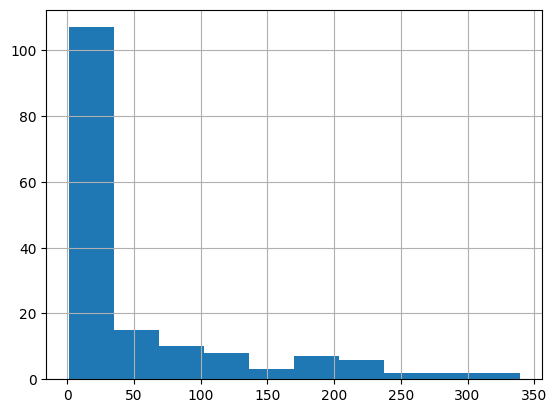

In [98]:
alcohol.hist();

In [99]:
# mean will excceed the median, positive skew distribution. 

In [100]:
iqr = alcohol.quantile(.75) - alcohol.quantile(.25)

In [101]:
iqr

np.float64(58.25)

In [102]:
# iqr is x5 times then our median

In [103]:
# min and max

In [104]:
alcohol.min()

np.float64(1.0)

In [105]:
alcohol.max()

np.float64(339.0)

In [106]:
alcohol.std() # standard deviation, sqrt of variant

np.float64(76.13491716376171)

In [107]:
alcohol.var() # 

np.float64(5796.5256115328575)

In [108]:
alcohol.std()**2 == alcohol.var()

np.True_

## The `describe()` Method

In [109]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [110]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [111]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [112]:
alcohol.dtype

dtype('float64')

## The mode & valuecount

In [113]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [114]:
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [115]:
alcohol[alcohol == 1].size

28

In [116]:
alcohol.value_counts()

wine_servings
1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: count, Length: 71, dtype: int64

In [117]:
alcohol.mode()

0    1.0
Name: wine_servings, dtype: float64

In [118]:
alcohol.value_counts().iloc[0], alcohol.value_counts().iloc[1],

(np.int64(28), np.int64(10))

In [119]:
# value_counts() : a sorted series containing unique values and their counts
# ser.value_counts(sort=True, ascending=False, dropna=True, normalize=False)

In [120]:
alcohol.value_counts(normalize=True) # normalize to relative frequency, not absolute count

wine_servings
1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: proportion, Length: 71, dtype: float64

In [121]:
28/162 # count of non-null values of the series

0.1728395061728395

In [122]:
28/alcohol.count()

np.float64(0.1728395061728395)

## `idxmax` & `idxmin`

In [123]:
alcohol.max()

np.float64(339.0)

In [124]:
alcohol[alcohol == alcohol.max()]

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [125]:
alcohol[alcohol == alcohol.max()].index

Index(['Portugal'], dtype='object', name='country')

In [126]:
list(alcohol[alcohol == alcohol.max()].index), alcohol[alcohol == alcohol.max()].index[0]

(['Portugal'], 'Portugal')

In [127]:
alcohol.idxmax() # Give me the label which is associated with the maximum value in the series

'Portugal'

In [128]:
alcohol.idxmin() # Vise versa, smallest value in the series, gives it's label

'Brunei'

In [129]:
alcohol.min()

np.float64(1.0)

In [130]:
alcohol.value_counts().head(1)

wine_servings
1.0    28
Name: count, dtype: int64

In [131]:
alcohol[alcohol == alcohol.min()].head(5)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Name: wine_servings, dtype: float64

In [132]:
alcohol[alcohol == alcohol.max()].head(5)

country
Portugal    339.0
Name: wine_servings, dtype: float64

In [133]:
alcohol[alcohol.idxmax()] # 'Portugal'

np.float64(339.0)

In [134]:
alcohol.max()

np.float64(339.0)

In [135]:
# idxmin(): returns the label of the row with minimum value
# inxmax(): returns the label of the row with maximum value
# NOTE: if we multiply min/max values, only `the first` label is returned

## Sorting With `sortvalues`

In [136]:
alcohol.sort_values() # ASC order

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [137]:
alcohol.sort_values(ascending=False) # DESC order

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [138]:
alcohol.sort_values(ascending=False, na_position='last') # 'last | first'

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [139]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort') # 'quicksort | mergesort | heapsort' - not change this default value unless needed,

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [140]:
alcohol.head() # until now we are only working with copied data, not the original data

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [141]:
# reassignment:
# inplace=True param:

In [142]:
alcohol.sort_values(ascending=False, na_position='last', kind='quicksort', inplace=False) # change this to True, if you want to mutate the original data

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

## `nlargest` & `nsmallest`

In [143]:
alcohol.min()

np.float64(1.0)

In [144]:
alcohol.max()

np.float64(339.0)

In [145]:
# these are very limited to single value i.e. min, max

In [146]:
alcohol.sort_values(ascending=False).head(10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [147]:
alcohol.sort_values(ascending=False)[:10] # longer approach

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [148]:
alcohol.nlargest(n=10) # shorter approach

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [149]:
alcohol.nsmallest(29)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
El Salvador                 2.0
Name: wine_servings, dtype: float64

## Sorting With `sortindex`

In [150]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [151]:
alcohol.sort_index()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [152]:
alcohol.sort_index(ascending=False)

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          1.0
Venezuela        3.0
               ...  
Angola          45.0
Andorra        312.0
Algeria         14.0
Albania         54.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [153]:
alcohol.sort_index(ascending=False, na_position='first', inplace=True) # No Na's in the label side

In [154]:
alcohol.index.isnull().sum()

np.int64(0)

In [155]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [156]:
# sort_values(): returns a new series, sorted by values
# sort_index(): returns a new series, sorted by index labels
# params: asending=True, inplace=False, na_position='last', kind='quicksort'

# Skill Challege 😈

In [157]:
fifty_plus = alcohol[alcohol > 50]

In [158]:
smallest_ = fifty_plus.nsmallest(20)

In [159]:
smallest_.describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [160]:
smallest_.mean(), smallest_.median(), smallest_.mode()

(np.float64(74.25),
 np.float64(73.5),
 0    51.0
 1    56.0
 2    59.0
 3    74.0
 Name: wine_servings, dtype: float64)

In [161]:
smallest_.std()

np.float64(19.07292100831631)

In [162]:
%matplotlib inline
# %matplotlib widget - it will show an error, and see at the bottom for more commands which goes with %matplotlib
smallest_.var()

np.float64(363.7763157894737)

<Axes: >

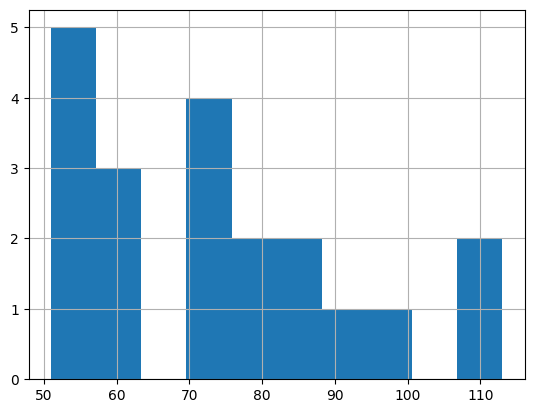

In [163]:
smallest_.hist()

## Calculating Variance & Standard Deviation

In [164]:
alcohol.var()

np.float64(5796.5256115328575)

In [165]:
(alcohol.subtract(alcohol.mean())**2).sum() / (alcohol.count() - 1) ## check sample formula

np.float64(5796.5256115328575)

In [166]:
alcohol.std()

np.float64(76.13491716376171)

In [167]:
((alcohol.subtract(alcohol.mean())**2).sum() / (alcohol.count() - 1)) ** (1/2) ## check sample formula

np.float64(76.13491716376171)

## Cumulative Operations

In [168]:
alcohol.sum()

np.float64(8221.0)

In [169]:
alcohol.cumsum(skipna=True) # it's adds the previous value to next

country
Zimbabwe          4.0
Zambia            8.0
Yemen             NaN
Vietnam           9.0
Venezuela        12.0
                ...  
Angola         7841.0
Andorra        8153.0
Algeria        8167.0
Albania        8221.0
Afghanistan       NaN
Name: wine_servings, Length: 193, dtype: float64

In [170]:
np.nan + 12

nan

In [171]:
alcohol.prod() # we can calculate the product of all servings

np.float64(3.4276115052182796e+183)

In [172]:
alcohol.cumprod()

country
Zimbabwe        4.000000e+00
Zambia          1.600000e+01
Yemen                    NaN
Vietnam         1.600000e+01
Venezuela       4.800000e+01
                   ...      
Angola         1.453166e+178
Andorra        4.533878e+180
Algeria        6.347429e+181
Albania        3.427612e+183
Afghanistan              NaN
Name: wine_servings, Length: 193, dtype: float64

In [173]:
alcohol.cumprod().iloc[-1] == alcohol.prod() # because the series is sorted, hence false

np.False_

In [174]:
alcohol.min()

np.float64(1.0)

In [175]:
alcohol.cummin()

country
Zimbabwe       4.0
Zambia         4.0
Yemen          NaN
Vietnam        1.0
Venezuela      1.0
              ... 
Angola         1.0
Andorra        1.0
Algeria        1.0
Albania        1.0
Afghanistan    NaN
Name: wine_servings, Length: 193, dtype: float64

In [176]:
alcohol.max()

np.float64(339.0)

In [177]:
alcohol.cummax()

country
Zimbabwe         4.0
Zambia           4.0
Yemen            NaN
Vietnam          4.0
Venezuela        4.0
               ...  
Angola         339.0
Andorra        339.0
Algeria        339.0
Albania        339.0
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [178]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

## Pairwise Difference with `diff()`

In [179]:
alcohol.head()

country
Zimbabwe     4.0
Zambia       4.0
Yemen        NaN
Vietnam      1.0
Venezuela    3.0
Name: wine_servings, dtype: float64

In [180]:
alcohol.diff().head() # next element vs the previos element, shifting back with 1, or called lag of 1, period of 1

country
Zimbabwe     NaN
Zambia       0.0
Yemen        NaN
Vietnam      NaN
Venezuela    2.0
Name: wine_servings, dtype: float64

In [181]:
alcohol.diff(periods=2).head() # compare with previou of previous, which is by 2

country
Zimbabwe     NaN
Zambia       NaN
Yemen        NaN
Vietnam     -3.0
Venezuela    NaN
Name: wine_servings, dtype: float64

In [182]:
# This will be usefull in time series understanding
# ser.diff(periods=1): the first discrete element-wise difference in a series

Periods=1 | Periods=-1 | Periods=2 |
----------|------------|-----------|
  v2 - v1 | v1 - v2    | v3 - v1   |
  v3 - v2 | v2 - v3    | v4 - v2   |

## Series Iteration

In [183]:
mini_alc = alcohol[:10]

In [184]:
mini_alc

country
Zimbabwe                  4.0
Zambia                    4.0
Yemen                     NaN
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  22.0
United Kingdom          195.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [185]:
for i in mini_alc:
    print(i)

4.0
4.0
nan
1.0
3.0
11.0
8.0
22.0
195.0
5.0


In [186]:
for i, j in enumerate(mini_alc):
    print(i, j)

0 4.0
1 4.0
2 nan
3 1.0
4 3.0
5 11.0
6 8.0
7 22.0
8 195.0
9 5.0


In [187]:
for i in mini_alc.index:
    print(i)

Zimbabwe
Zambia
Yemen
Vietnam
Venezuela
Vanuatu
Uzbekistan
Uruguay
United Kingdom
United Arab Emirates


In [188]:
for i in mini_alc.index:
    print(i, mini_alc[i])

Zimbabwe 4.0
Zambia 4.0
Yemen nan
Vietnam 1.0
Venezuela 3.0
Vanuatu 11.0
Uzbekistan 8.0
Uruguay 22.0
United Kingdom 195.0
United Arab Emirates 5.0


In [189]:
for i in mini_alc.items():
    print(i)

('Zimbabwe', 4.0)
('Zambia', 4.0)
('Yemen', nan)
('Vietnam', 1.0)
('Venezuela', 3.0)
('Vanuatu', 11.0)
('Uzbekistan', 8.0)
('Uruguay', 22.0)
('United Kingdom', 195.0)
('United Arab Emirates', 5.0)


In [190]:
# items method return a lazy evaliated iterable of tuples
# when we access it, it will evaluate, else not

## Filtering: `filter()`, `where()` & `mask()`

In [191]:
alcohol.filter(regex="^V") # regular expression

country
Vietnam       1.0
Venezuela     3.0
Vanuatu      11.0
Name: wine_servings, dtype: float64

In [192]:
alcohol.filter(like="stan") # just like sql

country
Uzbekistan       8.0
Turkmenistan    32.0
Tajikistan       NaN
Pakistan         NaN
Kyrgyzstan       6.0
Kazakhstan      12.0
Afghanistan      NaN
Name: wine_servings, dtype: float64

In [193]:
alcohol[alcohol > 200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [194]:
alcohol.loc[alcohol > 200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [195]:
def gt200(x):
    return x > 200

In [196]:
alcohol[gt200]

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [197]:
alcohol.where(lambda x: x>200, other='to small') # basically replacement method

country
Zimbabwe       to small
Zambia         to small
Yemen          to small
Vietnam        to small
Venezuela      to small
                 ...   
Angola         to small
Andorra           312.0
Algeria        to small
Albania        to small
Afghanistan    to small
Name: wine_servings, Length: 193, dtype: object

In [198]:
alcohol.where(lambda x: x>200,)

country
Zimbabwe         NaN
Zambia           NaN
Yemen            NaN
Vietnam          NaN
Venezuela        NaN
               ...  
Angola           NaN
Andorra        312.0
Algeria          NaN
Albania          NaN
Afghanistan      NaN
Name: wine_servings, Length: 193, dtype: float64

In [199]:
alcohol.where(lambda x: x>200,).dropna()

country
Slovenia             276.0
Portugal             339.0
Luxembourg           271.0
Italy                237.0
Greece               218.0
Equatorial Guinea    233.0
Denmark              278.0
Croatia              254.0
Belgium              212.0
Australia            212.0
Argentina            221.0
Andorra              312.0
Name: wine_servings, dtype: float64

In [200]:
alcohol.where(lambda x: x<200).dropna()

country
Zimbabwe              4.0
Zambia                4.0
Vietnam               1.0
Venezuela             3.0
Vanuatu              11.0
                     ... 
Armenia              11.0
Antigua & Barbuda    45.0
Angola               45.0
Algeria              14.0
Albania              54.0
Name: wine_servings, Length: 150, dtype: float64

In [201]:
alcohol.mask(lambda x: x>200).dropna()

country
Zimbabwe              4.0
Zambia                4.0
Vietnam               1.0
Venezuela             3.0
Vanuatu              11.0
                     ... 
Armenia              11.0
Antigua & Barbuda    45.0
Angola               45.0
Algeria              14.0
Albania              54.0
Name: wine_servings, Length: 150, dtype: float64

## Transforming With `update()`, `apply()`, & `map()`

In [202]:
alcohol.head(10)

country
Zimbabwe                  4.0
Zambia                    4.0
Yemen                     NaN
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  22.0
United Kingdom          195.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [203]:
# spot v global transforms

In [204]:
alcohol.loc['Zimbabwe'] = 19

In [205]:
alcohol[:10]

country
Zimbabwe                 19.0
Zambia                    4.0
Yemen                     NaN
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  22.0
United Kingdom          195.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [206]:
alcohol.loc['Yemen'] = 19
alcohol.loc['United Kingdom'] = 89
alcohol.loc['Uruguay'] = 27

In [207]:
# This is not scalable and not very good for larget manipulation of data

In [208]:
alcohol.head(10)

country
Zimbabwe                19.0
Zambia                   4.0
Yemen                   19.0
Vietnam                  1.0
Venezuela                3.0
Vanuatu                 11.0
Uzbekistan               8.0
Uruguay                 27.0
United Kingdom          89.0
United Arab Emirates     5.0
Name: wine_servings, dtype: float64

In [209]:
alcohol.update(pd.Series(data=[200, 20], index=['Zimbabwe', 'Yemen']))

In [210]:
alcohol.head(10)

country
Zimbabwe                200.0
Zambia                    4.0
Yemen                    20.0
Vietnam                   1.0
Venezuela                 3.0
Vanuatu                  11.0
Uzbekistan                8.0
Uruguay                  27.0
United Kingdom           89.0
United Arab Emirates      5.0
Name: wine_servings, dtype: float64

In [211]:
# we'll build our own software deleveloper workforce, xCodeClazz Workforce List, anyone can see their profile and can hire on cheap rates.

In [212]:
# apply method applies the change to each and every element of the series, - best for large datasets

In [213]:
alcohol.apply(lambda x: x**2)

country
Zimbabwe       40000.0
Zambia            16.0
Yemen            400.0
Vietnam            1.0
Venezuela          9.0
                ...   
Angola          2025.0
Andorra        97344.0
Algeria          196.0
Albania         2916.0
Afghanistan        NaN
Name: wine_servings, Length: 193, dtype: float64

In [214]:
alcohol.apply(np.square)

country
Zimbabwe       40000.0
Zambia            16.0
Yemen            400.0
Vietnam            1.0
Venezuela          9.0
                ...   
Angola          2025.0
Andorra        97344.0
Algeria          196.0
Albania         2916.0
Afghanistan        NaN
Name: wine_servings, Length: 193, dtype: float64

In [215]:
def multiply_by_self(x):
    return x*x

In [216]:
alcohol.apply(multiply_by_self)

country
Zimbabwe       40000.0
Zambia            16.0
Yemen            400.0
Vietnam            1.0
Venezuela          9.0
                ...   
Angola          2025.0
Andorra        97344.0
Algeria          196.0
Albania         2916.0
Afghanistan        NaN
Name: wine_servings, Length: 193, dtype: float64

In [217]:
def multiply_by_self_with_min(x, min_serving):
    # x: reserve for series data
    # min_serving: getting from args
    if x < min_serving:
        return x**2
    return x

In [218]:
alcohol.apply(multiply_by_self_with_min, args=(200,)) # positional args

country
Zimbabwe        200.0
Zambia           16.0
Yemen           400.0
Vietnam           1.0
Venezuela         9.0
                ...  
Angola         2025.0
Andorra         312.0
Algeria         196.0
Albania        2916.0
Afghanistan       NaN
Name: wine_servings, Length: 193, dtype: float64

In [219]:
alcohol.apply(multiply_by_self_with_min, min_serving=200) # keyward args

country
Zimbabwe        200.0
Zambia           16.0
Yemen           400.0
Vietnam           1.0
Venezuela         9.0
                ...  
Angola         2025.0
Andorra         312.0
Algeria         196.0
Albania        2916.0
Afghanistan       NaN
Name: wine_servings, Length: 193, dtype: float64

In [220]:
# substitution operation, 

In [221]:
alcohol.map(lambda x: x**2) # equivalent like apply()

country
Zimbabwe       40000.0
Zambia            16.0
Yemen            400.0
Vietnam            1.0
Venezuela          9.0
                ...   
Angola          2025.0
Andorra        97344.0
Algeria          196.0
Albania         2916.0
Afghanistan        NaN
Name: wine_servings, Length: 193, dtype: float64

In [222]:
# alcohol.map(multiply_by_self_with_min, min_serving=200) # won't work with map

##### Transforms

- update(): modifies series values in place using another series `ser.update(other_series)`
- apply(): applies function (or ufunc) on each series value `ser.apply(np.sqrt)` **Most Flexible** `Recommanded`
- map(): subs series values with others from a function, series (more input types), or dect `ser.map({'old_value': 'new_value'})`

# Skill Challege 😈

In [223]:
beer_serving = pd.read_csv(csv_url)

In [224]:
beer_serving

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


array([[<Axes: title={'center': 'beer_servings'}>,
        <Axes: title={'center': 'spirit_servings'}>],
       [<Axes: title={'center': 'wine_servings'}>,
        <Axes: title={'center': 'total_litres_of_pure_alcohol'}>]],
      dtype=object)

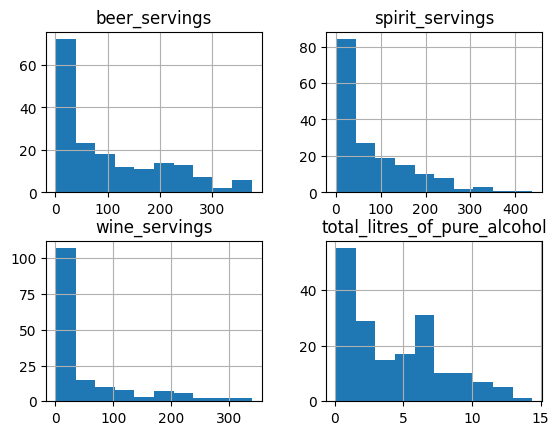

In [225]:
beer_serving.hist()

In [226]:
type(beer_serving), beer_serving.dtypes

(pandas.core.frame.DataFrame,
 country                          object
 beer_servings                   float64
 spirit_servings                 float64
 wine_servings                   float64
 total_litres_of_pure_alcohol    float64
 dtype: object)

In [227]:
beers = pd.read_csv(csv_url, usecols=['country', 'beer_servings'], index_col='country').squeeze('columns')

In [228]:
beers

country
Afghanistan      NaN
Albania         89.0
Algeria         25.0
Andorra        245.0
Angola         217.0
               ...  
Venezuela      333.0
Vietnam        111.0
Yemen            6.0
Zambia          32.0
Zimbabwe        64.0
Name: beer_servings, Length: 193, dtype: float64

In [229]:
type(beers), beers.dtypes

(pandas.core.series.Series, dtype('float64'))

In [230]:
mean = beers.mean()

In [231]:
mean

np.float64(102.87078651685393)

In [232]:
median = beers.median()

In [233]:
median, beers.quantile(.5)

(np.float64(60.0), np.float64(60.0))

In [234]:
std = beers.std()

In [235]:
std, beers.var()**(1/2), np.sqrt(beers.var())

(np.float64(100.6457126793478),
 np.float64(100.6457126793478),
 np.float64(100.6457126793478))

In [236]:
# it's right skweed, means, tails is on the right, not a normal distribution

<Axes: >

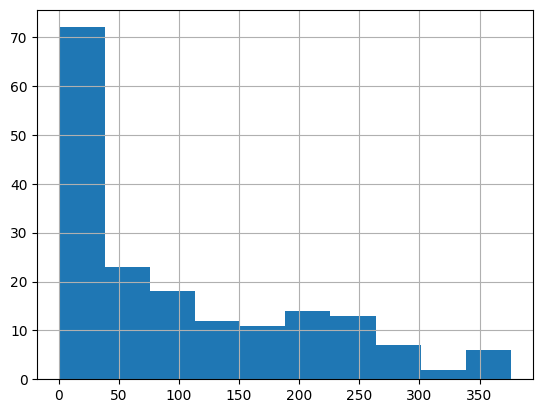

In [237]:
beers.hist()

In [238]:
first_10_countries = beers.head(10)

In [239]:
first_10_countries

country
Afghanistan            NaN
Albania               89.0
Algeria               25.0
Andorra              245.0
Angola               217.0
Antigua & Barbuda     12.0
Argentina            193.0
Armenia               21.0
Australia            261.0
Austria              279.0
Name: beer_servings, dtype: float64

In [241]:
beers.describe()

count    178.000000
mean     102.870787
std      100.645713
min        1.000000
25%       21.000000
50%       60.000000
75%      172.500000
max      376.000000
Name: beer_servings, dtype: float64

In [242]:
first_10_countries - mean

country
Afghanistan                 NaN
Albania              -13.870787
Algeria              -77.870787
Andorra              142.129213
Angola               114.129213
Antigua & Barbuda    -90.870787
Argentina             90.129213
Armenia              -81.870787
Australia            158.129213
Austria              176.129213
Name: beer_servings, dtype: float64

In [243]:
(first_10_countries - mean).apply(lambda x: 'low' if x < 0 else 'high')

country
Afghanistan          high
Albania               low
Algeria               low
Andorra              high
Angola               high
Antigua & Barbuda     low
Argentina            high
Armenia               low
Australia            high
Austria              high
Name: beer_servings, dtype: object

In [244]:
(beers - mean).apply(lambda x: 'low' if x < 0 else 'high').value_counts()

beer_servings
low     112
high     81
Name: count, dtype: int64

In [245]:
z_scores = (beers - mean) / std

In [246]:
z_scores # how much away from the mean, adjected by the standard deviation

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [247]:
z_scores.min()

np.float64(-1.0121721413152407)

In [248]:
z_scores.max()

np.float64(2.713768984410912)

In [249]:
z_scores.abs().max()

np.float64(2.713768984410912)

In [250]:
beers.idxmax()

'Namibia'

In [251]:
beers[beers.idxmax()]

np.float64(376.0)

In [252]:
# another way

In [253]:
z_scores.abs().max() * beers.std() + beers.mean() # z-score formula

np.float64(376.0)

In [266]:
# ask GPT, to take a sample data set, find mean, median, mode, z-score, std and variance, also IQR and much more about this data set, now also ask to 
# draw a conclution on that data set like what do you think about this
# make me master on this, calculations. like when and what to do,
# practice on multiple data sets